In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("Preplacement.csv")

In [3]:
dataset

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.000000,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.000000,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.000000,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,4.0,56.00,52.00,52.00,66.0,59.43,288655.405405,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.000000,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211.0,80.60,82.00,77.60,91.0,74.49,400000.000000,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,212.0,58.00,60.00,72.00,74.0,53.62,275000.000000,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,213.0,67.00,67.00,73.00,59.0,69.72,295000.000000,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,214.0,74.00,66.00,58.00,70.0,60.23,204000.000000,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [4]:
dataset.isnull().sum()

sl_no             0
ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
dtype: int64

In [7]:
import seaborn as sns

In [6]:
#!pip install seaborn

     ------------------------------------ 293.3/293.3 kB 232.2 kB/s eta 0:00:00


C:\Users\kathi\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


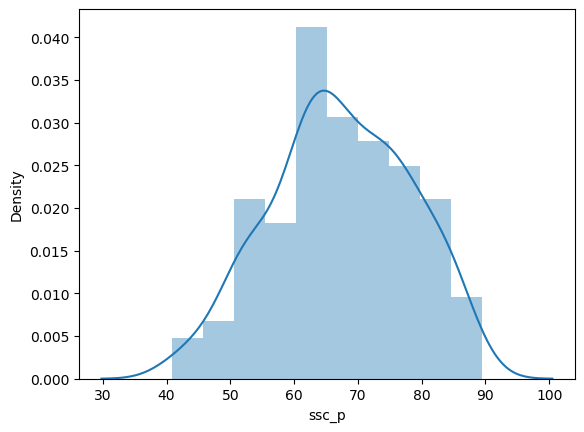

In [8]:
sns.distplot(dataset["ssc_p"])

In [16]:
def get_pdf_probability(dataset,startrange,endrange):
    import matplotlib.pyplot as plt
    from scipy.stats import norm
    import seaborn as sns
    ax=sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    plt.axvline(startrange,color='Red')
    plt.axvline(endrange,color='Red')
    #generate a sample
    sample=dataset
    #calculate parameters
    sample_mean=sample.mean()
    sample_std=sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' %(sample_mean,sample_std))
    #define the distribution
    dist=norm(sample_mean,sample_std)
    #probability for a range
    values=[value for value in range(startrange,endrange)]
    probability=[dist.pdf(value) for value in values]
    prob=sum(probability)
    print('The area between range({},{}):{}'.format(startrange,endrange,prob))
    return prob

Mean=67.303, Standard Deviation=10.827
The area between range(40,70):0.5753110269235301


C:\Users\kathi\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """


0.5753110269235301

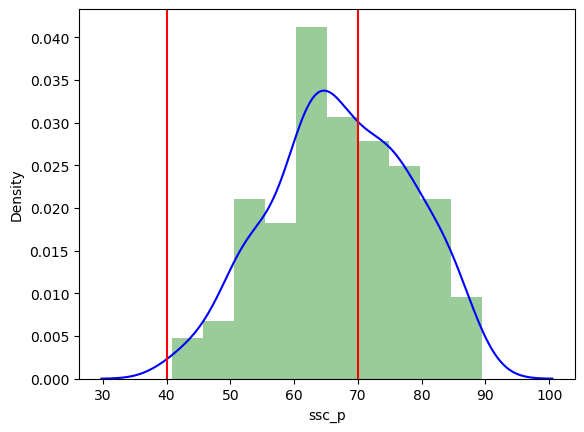

In [17]:
get_pdf_probability(dataset["ssc_p"],40,70)

In [22]:
#Cumulative density function
from statsmodels.distributions.empirical_distribution import ECDF
ecdf=ECDF(dataset["ssc_p"])
ecdf(98)

1.0

In [20]:
#!pip install statsmodels 

     ---------------------------------------- 9.1/9.1 MB 2.6 MB/s eta 0:00:00
     -------------------------------------- 233.9/233.9 kB 4.8 MB/s eta 0:00:00


In [29]:
def stdNDgraph(dataset):
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()
    values=[i for i in dataset]
    z_score=[((j-mean)/std) for j in values]
    sns.distplot(z_score,kde=True)
    sum(z_score)/len(z_score)

C:\Users\kathi\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys


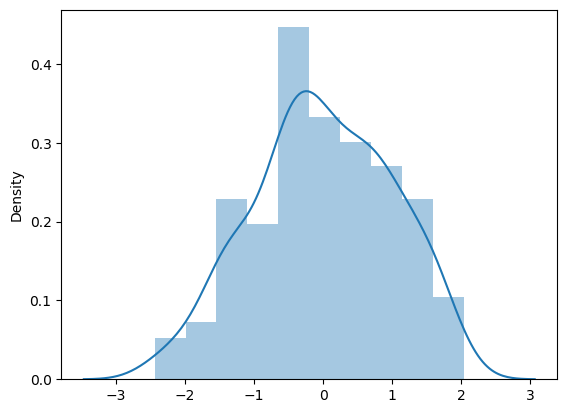

In [30]:
stdNDgraph(dataset["ssc_p"])